# **This dataset contains information about 268 products listed on a quick-commerce platform like Blinkit. Each row represents a product, and there are 10 columns that describe various attributes of these products:**

# **product_id –** This is a unique identifier for each product.

# **product_name –** The name of the product.

# **category –** The category the product belongs to, like "Fruits & Vegetables".

# **brand –** The brand or manufacturer of the product.

# **price –** The actual selling price of the product.

# **mrp –** The Maximum Retail Price (MRP) set by the manufacturer.

# **margin_percentage – **The profit margin percentage (probably calculated from price vs MRP).

# **shelf_life_days –** How many days the product can stay on the shelf before it expires.

# **min_stock_level –** The minimum stock level that should be maintained.

# **max_stock_level –** The maximum stock level allowed.

Overall, this dataset can help with tasks like inventory management, pricing strategy, profit analysis, and understanding product categories.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ** 1. Load and Display the Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving blinkit_products.csv to blinkit_products.csv


In [3]:
import pandas as pd

df = pd.read_csv("blinkit_products.csv")
df.head()

product_id product_name             category                    brand  \
0      153019       Onions  Fruits & Vegetables               Aurora LLC   
1       11422     Potatoes  Fruits & Vegetables           Ramaswamy-Tata   
2      669378     Potatoes  Fruits & Vegetables          Chadha and Sons   
3      848226     Tomatoes  Fruits & Vegetables           Barad and Sons   
4      890623       Onions  Fruits & Vegetables  Sangha, Nagar and Varty   

    price      mrp  margin_percentage  shelf_life_days  min_stock_level  \
0  947.95  1263.93               25.0                3               13   
1  127.16   169.55               25.0                3               20   
2  212.14   282.85               25.0                3               23   
3  209.59   279.45               25.0                3               10   
4  354.52   472.69               25.0                3               27   

   max_stock_level  
0               88  
1               65  
2               70  
3               51  
4               55

# ** 2. Initial Data Overview**

In [4]:
# Get basic info about the dataset: data types, nulls, duplicates, and statistics
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(f"Duplicated rows: {df.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB
None
          product_id       price          mrp  margin_percentage  \
count     268.000000  268.000000   268.000000         268.000000   
mean   514855.940299  488.356828   680.434739          27.779851   
std    291391.529820  298.487200   419.772224  

# **3. Data Cleaning**

In [5]:
# Clean the dataset by removing duplicates, stripping whitespace, converting price to numeric, and dropping rows with missing prices
df.drop_duplicates(inplace=True)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])


<ipython-input-5-8d61cc11bbeb>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [6]:
# Create a new feature: word count based on product name
df['name_word_count'] = df['product_name'].apply(lambda x: len(str(x).split()))


In [7]:
print(df.columns.tolist())


['product_id', 'product_name', 'category', 'brand', 'price', 'mrp', 'margin_percentage', 'shelf_life_days', 'min_stock_level', 'max_stock_level', 'name_word_count']


# ** 5. Visualization: Distribution of Prices**

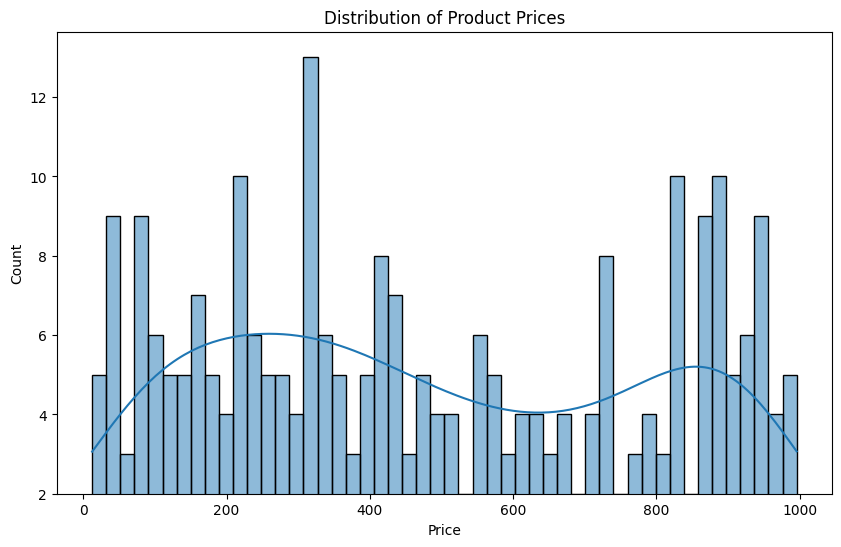

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a histogram to visualize the distribution of product prices
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.ylim(2, plt.ylim()[1])
plt.show()


# ** 6. Visualization: Top 10 Categories by Product Count**

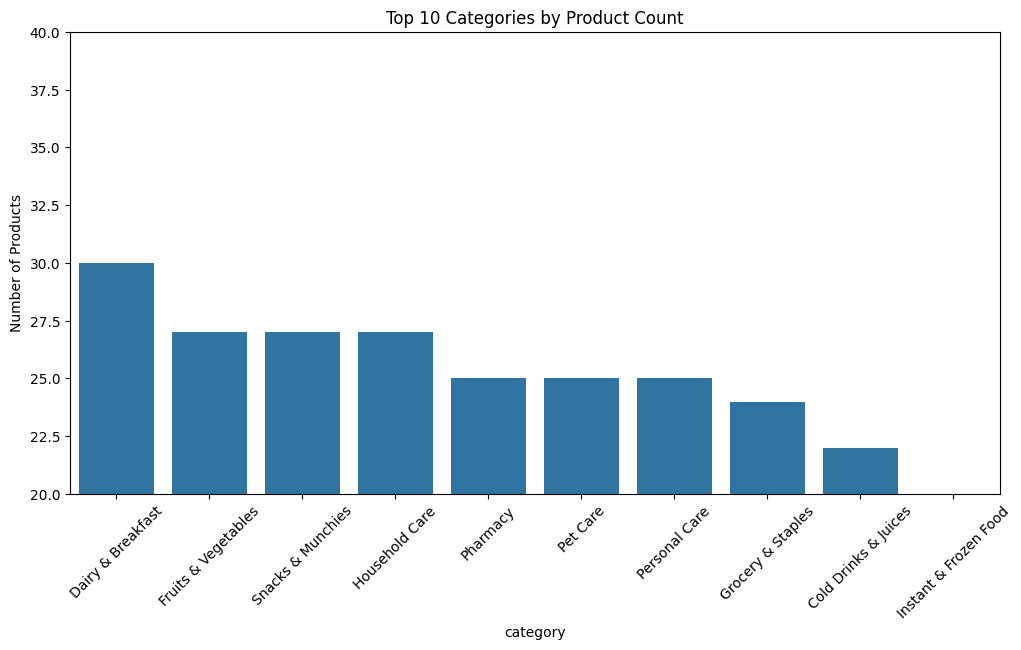

In [10]:
# Plot a bar chart showing the top 10 most common product categories
plt.figure(figsize=(12,6))
top_categories = df['category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top 10 Categories by Product Count')
plt.ylabel('Number of Products')
plt.ylim(20, max(top_categories.values) + 10)
plt.xticks(rotation=45)
plt.show()


# ** 7. Visualization: Price Distribution by Top**

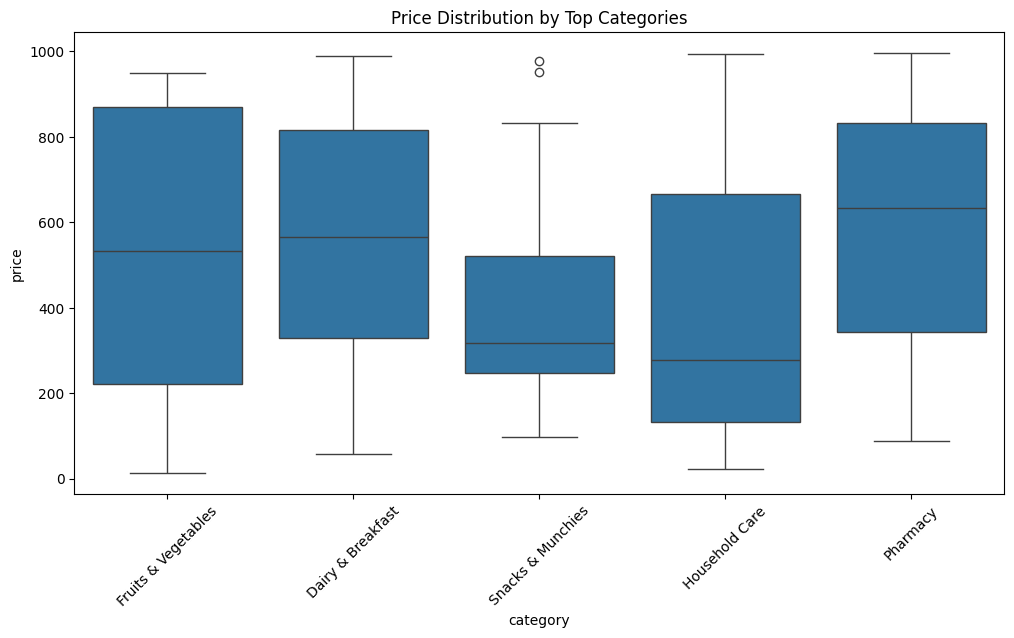

In [11]:
# Use boxplots to compare price ranges across the top 5 product categories
plt.figure(figsize=(12,6))
top_cats = df['category'].value_counts().nlargest(5).index
sns.boxplot(data=df[df['category'].isin(top_cats)], x='category', y='price')
plt.title('Price Distribution by Top Categories')
plt.xticks(rotation=45)
plt.show()


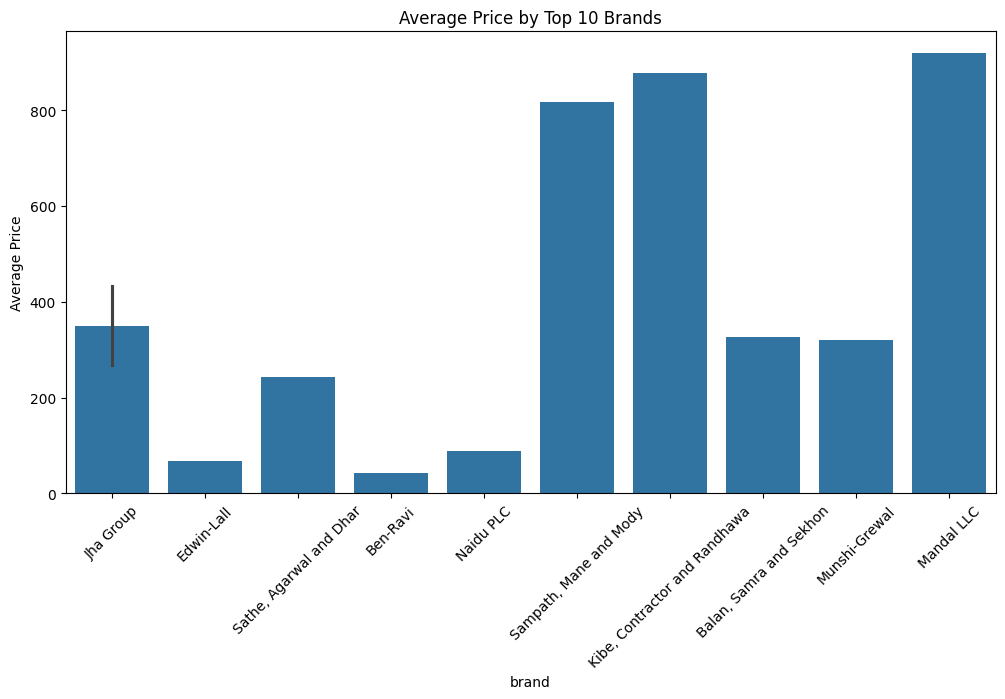

In [12]:
# Compare average prices across the top brands
top_brands = df['brand'].value_counts().nlargest(10).index

plt.figure(figsize=(12,6))
sns.barplot(data=df[df['brand'].isin(top_brands)], x='brand', y='price')
plt.title('Average Price by Top 10 Brands')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


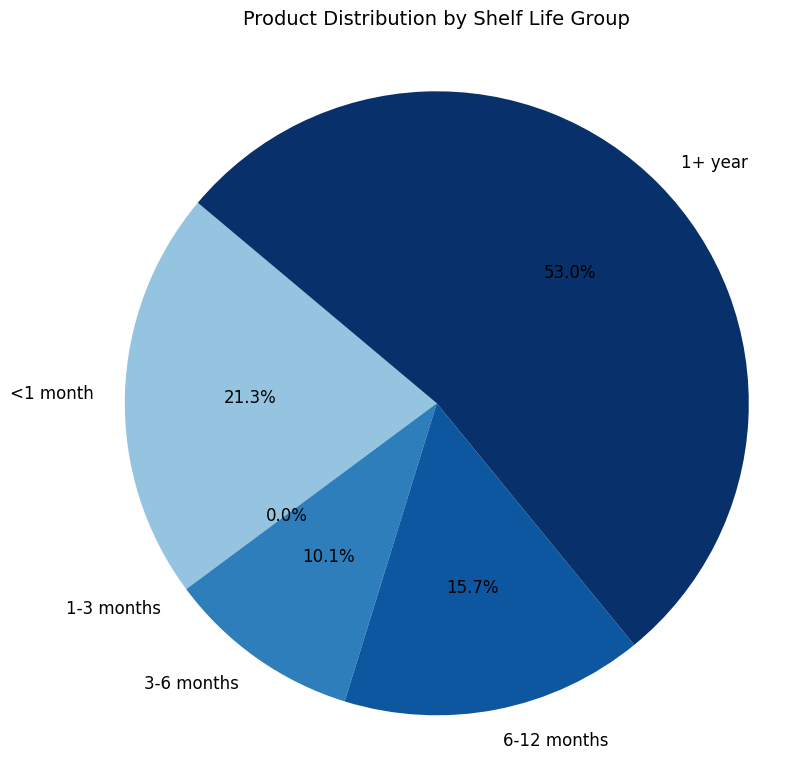

In [19]:
# Group shelf life into ranges and visualize the distribution as a pie chart

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = df[df['shelf_life_days'].notna()]

bins = [0, 30, 90, 180, 365, df['shelf_life_days'].max() + 1]
labels = ['<1 month', '1-3 months', '3-6 months', '6-12 months', '1+ year']
df['shelf_life_group'] = pd.cut(df['shelf_life_days'], bins=bins, labels=labels, right=False)

shelf_life_counts = df['shelf_life_group'].value_counts().sort_index()

colors = plt.cm.Blues(np.linspace(0.4, 1, len(shelf_life_counts)))
plt.figure(figsize=(8, 8))
plt.pie(shelf_life_counts, labels=shelf_life_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title('Product Distribution by Shelf Life Group', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


# **margin analysis**

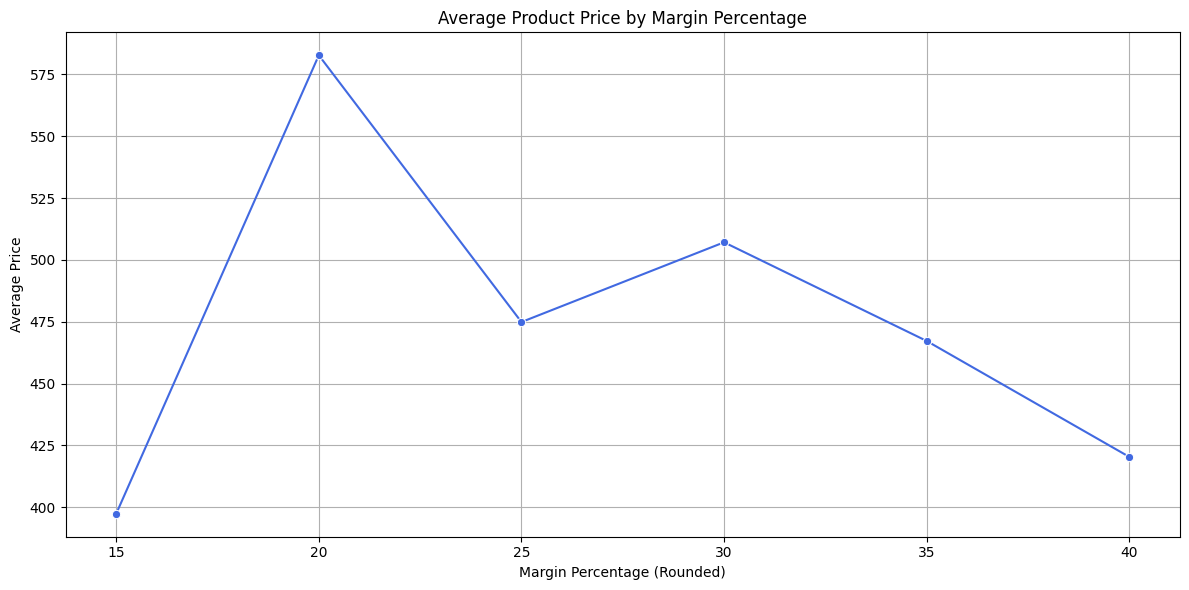

In [23]:
# This line plot shows the relationship between the margin percentage and the average product price.
# The margin_percentage is rounded to the nearest whole number, and the average price for each margin group is calculated.
# The plot illustrates how the average price changes as the margin percentage increases, helping to visualize trends in pricing across different profit margins.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['margin_rounded'] = df['margin_percentage'].round()
avg_price_by_margin = df.groupby('margin_rounded')['price'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_price_by_margin.index, y=avg_price_by_margin.values, marker='o', color='royalblue')
plt.title('Average Product Price by Margin Percentage')
plt.xlabel('Margin Percentage (Rounded)')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


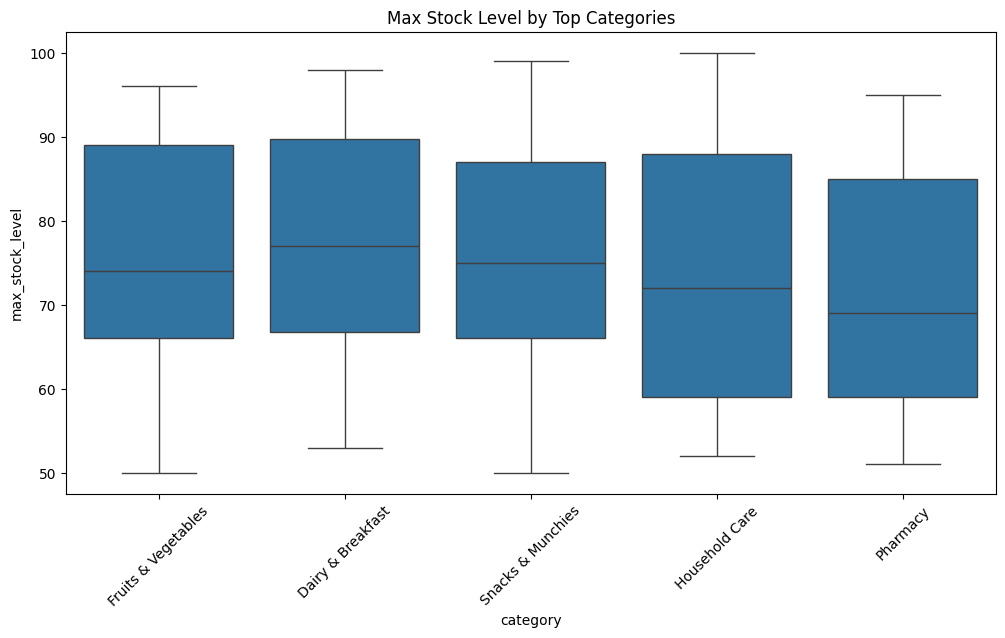

In [15]:
# Visualize stock levels by category
top_cats = df['category'].value_counts().nlargest(5).index
df_stock = df[df['category'].isin(top_cats)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_stock, x='category', y='max_stock_level')
plt.title('Max Stock Level by Top Categories')
plt.xticks(rotation=45)
plt.show()


In [24]:
# Save the cleaned dataset to a new CSV file
df.to_csv("blinkit_products_cleaned.csv", index=False)


In [25]:
from google.colab import files
files.download("blinkit_products_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>